In [4]:
import glob
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


import cartopy.feature as feat

folder = ['/projects/NS9252K/noresm/cases/WP4_shofer/n.n202.NSSP585frc2.f09_tn14.ssp585.001_global/atm/hist/COSP/cloud_feedbacks/',
          '/projects/NS9252K/noresm/cases/WP4_shofer/n.n202.NSSP585frc2.f09_tn14.ssp585.002_NH/atm/hist/COSP/cloud_feedbacks/',
          '/projects/NS9252K/noresm/cases/WP4_shofer/n.n202.NSSP585frc2.f09_tn14.ssp585.003_SH/atm/hist/COSP/cloud_feedbacks/']


def preprocess(ds):
    ds['year'] = pd.to_datetime(str(ds.year.values))
    return ds


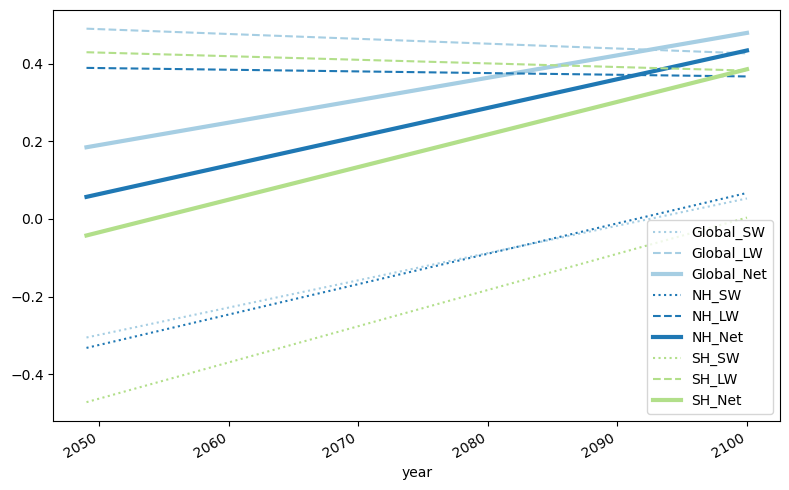

In [5]:
names = ['Global', 'NH', 'SH']
colors = ['#a6cee3', '#1f78b4', '#b2df8a']
i = 0
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
for f in folder:
    list_files_SW = sorted(glob.glob(f + 'SW_cloud_feedbacks_ALL*.nc'))
    list_files_LW = sorted(glob.glob(f + 'LW_cloud_feedbacks_ALL*.nc'))

    ds_SW = xr.open_mfdataset(
        list_files_SW, concat_dim='year', combine='nested', preprocess=preprocess)
    ds_LW = xr.open_mfdataset(
        list_files_LW, concat_dim='year', combine='nested', preprocess=preprocess)

    ds_SW.SWcld_tot.mean(dim=['lat', 'lon', 'month']
                         ).isel(year=[-2, -1]).plot(label=names[i] + '_SW', linestyle='dotted', color=colors[i], ax=axs)
    ds_LW.LWcld_tot.mean(dim=['lat', 'lon', 'month']
                         ).isel(year=[-2, -1]).plot(label=names[i] + '_LW', linestyle='dashed', color=colors[i], ax=axs)

    net = ds_SW.SWcld_tot.mean(
        dim=['lat', 'lon', 'month']) + ds_LW.LWcld_tot.mean(dim=['lat', 'lon', 'month'])
    net.isel(year=[-2, -1]).plot(label=names[i] + '_Net',
                                 linestyle='solid', lw=3, color=colors[i], ax=axs)

    i += 1

    plt.legend()
    fig.tight_layout()

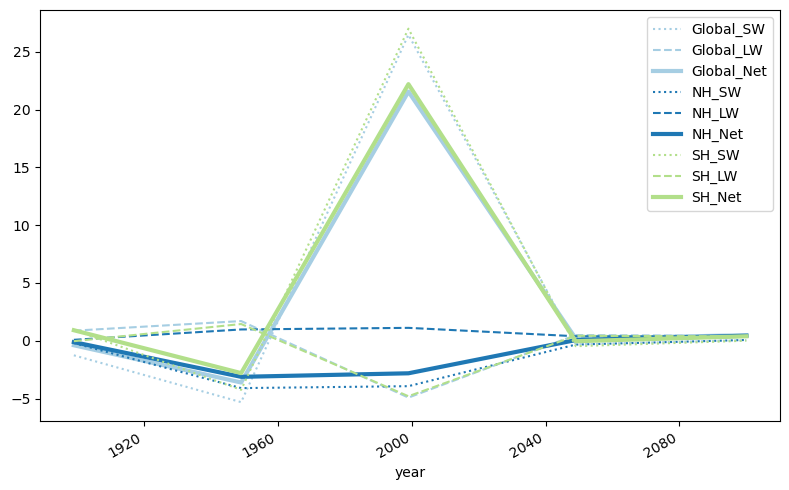

In [6]:
names = ['Global', 'NH', 'SH']
colors = ['#a6cee3', '#1f78b4', '#b2df8a']
i = 0
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
for f in folder:
    list_files_SW = sorted(glob.glob(f + 'SW_cloud_feedbacks_ALL*.nc'))
    list_files_LW = sorted(glob.glob(f + 'LW_cloud_feedbacks_ALL*.nc'))

    ds_SW = xr.open_mfdataset(
        list_files_SW, concat_dim='year', combine='nested', preprocess=preprocess)
    ds_LW = xr.open_mfdataset(
        list_files_LW, concat_dim='year', combine='nested', preprocess=preprocess)

    ds_SW.SWcld_tot.mean(dim=['lat', 'lon', 'month']
                         ).plot(label=names[i] + '_SW', linestyle='dotted', color=colors[i], ax=axs)
    ds_LW.LWcld_tot.mean(dim=['lat', 'lon', 'month']
                         ).plot(label=names[i] + '_LW', linestyle='dashed', color=colors[i], ax=axs)

    net = ds_SW.SWcld_tot.mean(
        dim=['lat', 'lon', 'month']) + ds_LW.LWcld_tot.mean(dim=['lat', 'lon', 'month'])
    net.plot(label=names[i] + '_Net',
             linestyle='solid', lw=3, color=colors[i], ax=axs)

    i += 1

    plt.legend()
    fig.tight_layout()